In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns
import pandas as pd

In [2]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [3]:
df_edge = pd.read_csv('twitch\FR\musae_FR_edges.csv')
df_target = pd.read_csv('twitch\FR\musae_FR_target.csv')

In [4]:
df_target = df_target[df_target.partner.eq(True)]

In [5]:
#Caricamento del grafo orientato
nodes = df_target['new_id'].to_list()
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

In [6]:
graph = nx.DiGraph()
graph.add_edges_from(edges)
graph.add_nodes_from(nodes)
pos = nx.spring_layout(graph)

### Analisi descrittiva

In [7]:
print("NODES: ", len(graph.nodes))
print("EDGES: ", len(graph.edges))
print("DENSITY: ", round(nx.density(graph),3))
print("CLUSTERING: ", nx.average_clustering(graph))
#print("RAGGIO: ", nx.radius(graph))
#print("DIAMETRO: ", nx.diameter(graph))
#print("IS_CONNECTED: ", nx.is_connected(graph))

NODES:  408
EDGES:  5792
DENSITY:  0.035
CLUSTERING:  0.1594474962719247


In [8]:
nx.clustering(graph)

{98: 0.11739130434782609,
 1616: 0.11699507389162561,
 4719: 0.19973009446693657,
 577: 0.176984126984127,
 586: 0.2276923076923077,
 2448: 0.18313725490196078,
 6148: 0.14114552893045004,
 1726: 0.06666666666666667,
 5388: 0.08333333333333333,
 1015: 0.11088709677419355,
 1939: 0.14444444444444443,
 5188: 0.25666666666666665,
 612: 0.09516172146484897,
 1440: 0.12792792792792793,
 421: 0.10606060606060606,
 4960: 0.16133004926108374,
 1548: 0.16996047430830039,
 5310: 0.08295454545454546,
 5708: 0.1568627450980392,
 4565: 0.12473572938689217,
 4211: 0.11997885835095137,
 4047: 0.17331560283687944,
 1261: 0.12,
 2496: 0.2134502923976608,
 539: 0.14055299539170507,
 4998: 0.08333333333333333,
 3920: 0.13296317942723554,
 142: 0.16466346153846154,
 2614: 0.1568627450980392,
 2161: 0.07337983144434758,
 1020: 0.07337909992372235,
 1314: 0.14102564102564102,
 4586: 0.10967741935483871,
 3931: 0.13004032258064516,
 5095: 0.09971509971509972,
 1183: 0.1862334032145353,
 4692: 0.25,
 761: 0.2

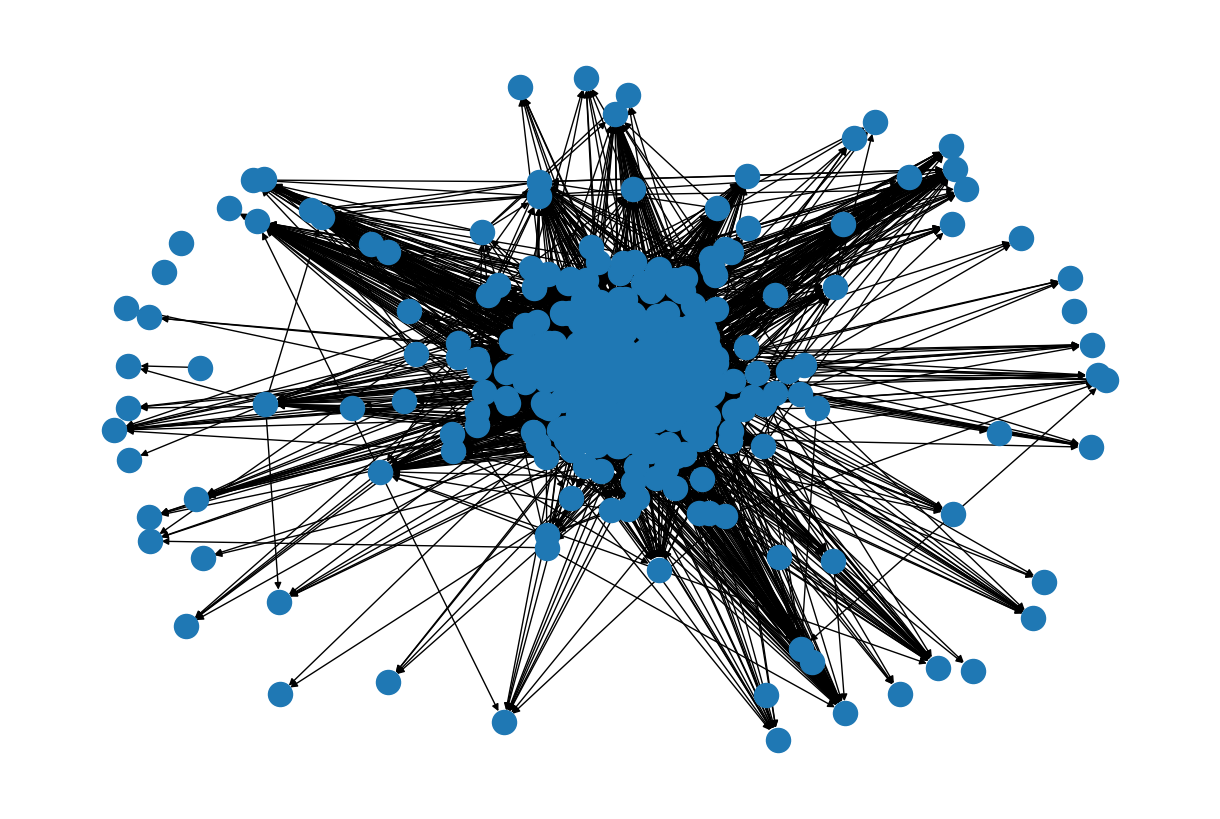

In [9]:
plt.figure(figsize=(12,8))
nx.draw(graph, pos)
plt.show()

### Analisi della centralità

Degree Centrality

<Figure size 1500x1000 with 0 Axes>

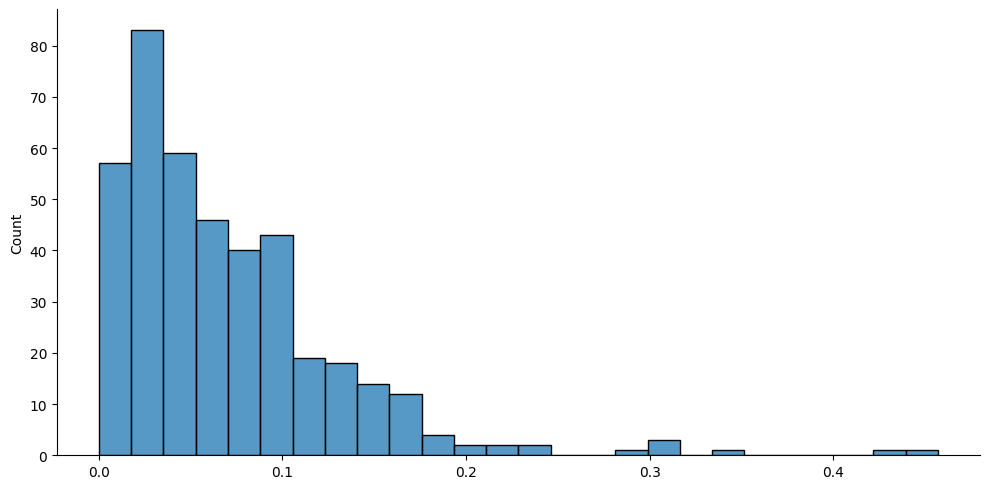

In [10]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(degree.values()), kde=False, aspect = 2)

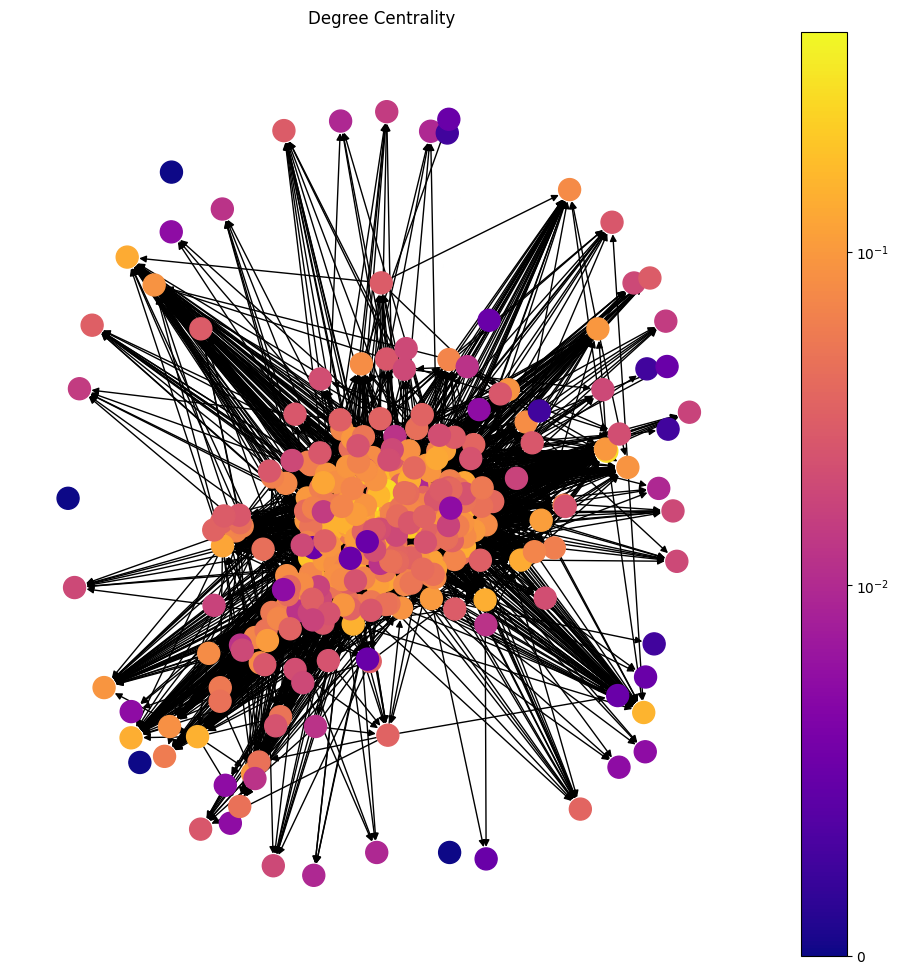

In [11]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, degree, 'Degree Centrality')

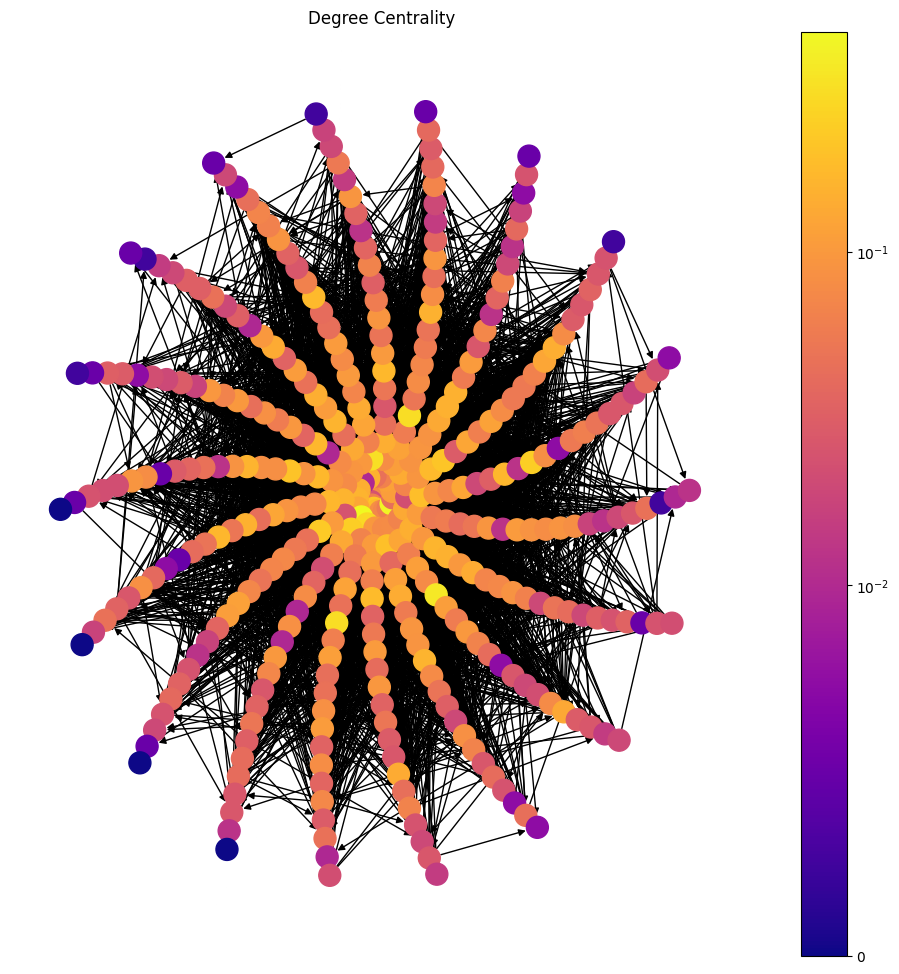

In [12]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Degree Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{612: Text(0.08549510657827837, 0.04628761149192265, '612'),
 5310: Text(0.06968810577129143, 0.004914179407758361, '5310'),
 2161: Text(0.03358802356269047, -0.017760572627969547, '2161'),
 1020: Text(0.19360626721812937, 0.2566555401384996, '1020'),
 5968: Text(0.4384143064124662, -0.3693505249210612, '5968'),
 38: Text(0.09196500350965178, 0.033535486998093424, '38'),
 2650: Text(0.09549456264038042, 0.03696094699932786, '2650'),
 3917: Text(-0.13202371469236887, 0.005737327882137574, '3917'),
 5511: Text(0.10399362856305527, -0.06123699769057495, '5511'),
 5543: Text(0.12714562874959034, -0.0004277819482048252, '5543'),
 771: Text(-0.09060565522253188, -0.0030015834284482347, '771'),
 5208: Text(0.059248060481063486, 0.016931055962943423, '5208'),
 6420: Text(-0.1583955543941287, -0.09731166983699734, '6420')}

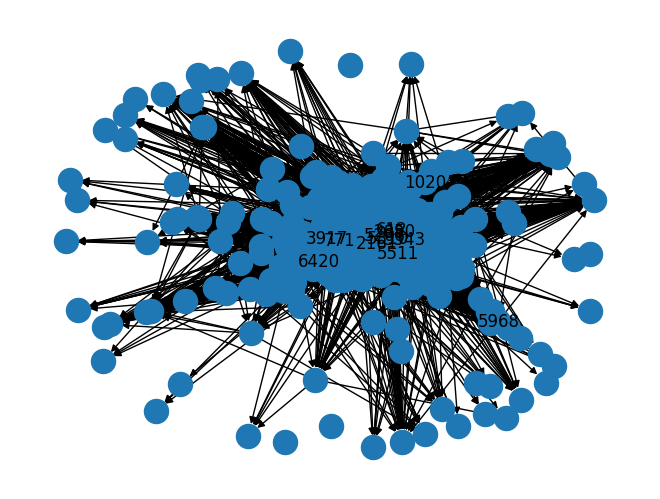

In [13]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in degree.items():
    if value > 0.2: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

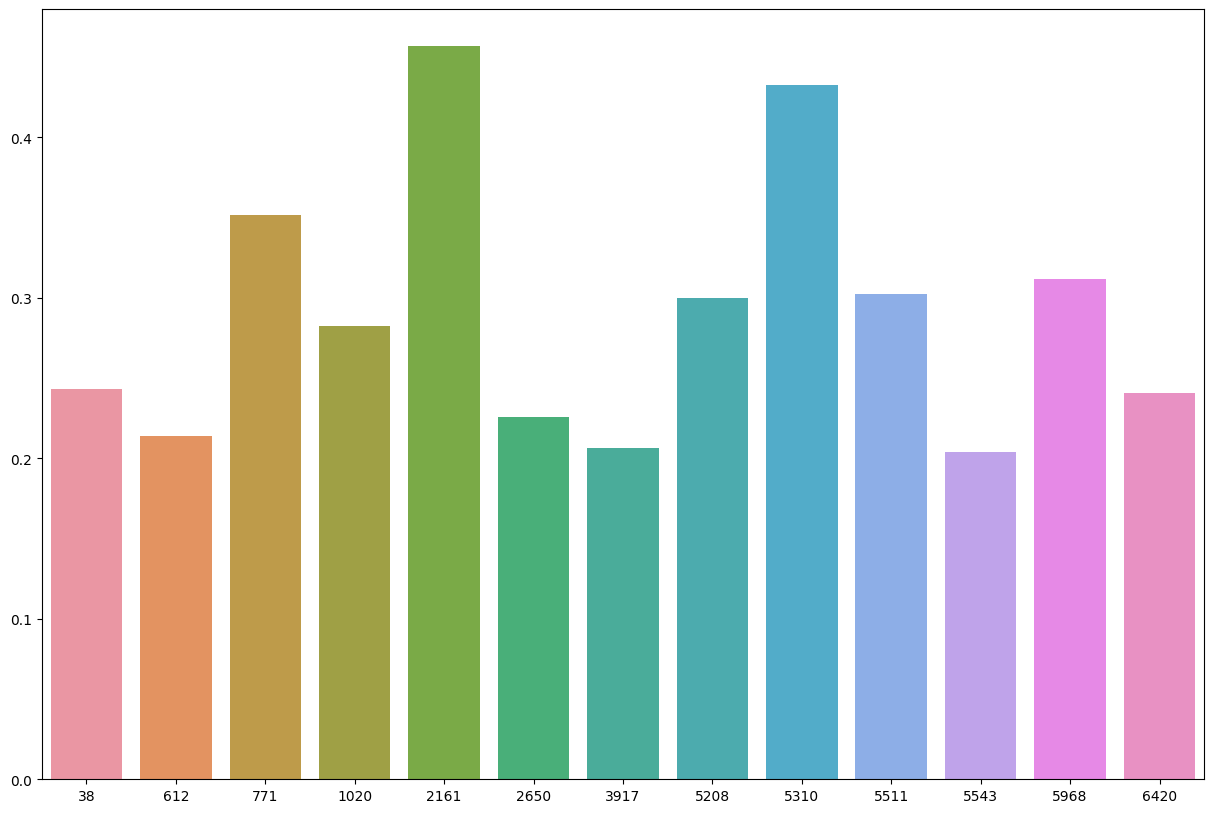

In [14]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in degree.items():
    if value > 0.2: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

Betweenness Centrality

<Figure size 1500x1000 with 0 Axes>

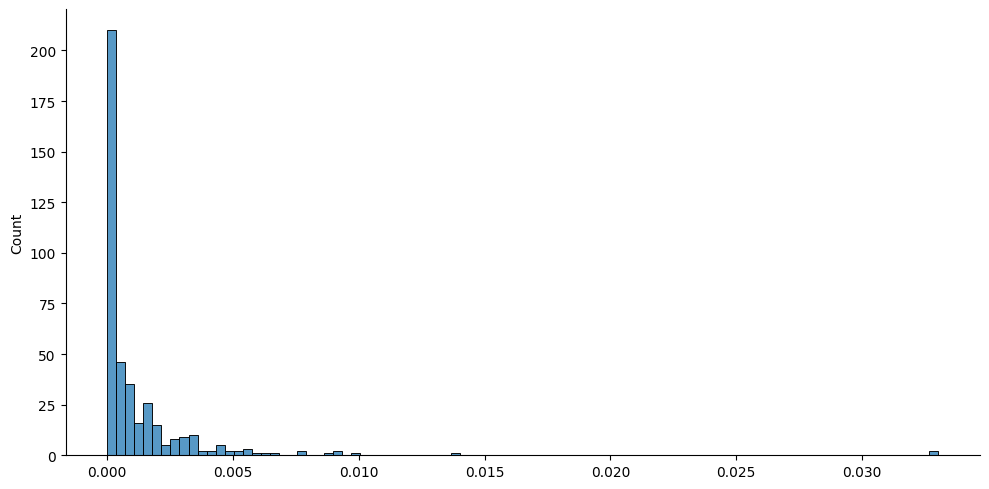

In [9]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(bet.values()), kde=False, aspect = 2)

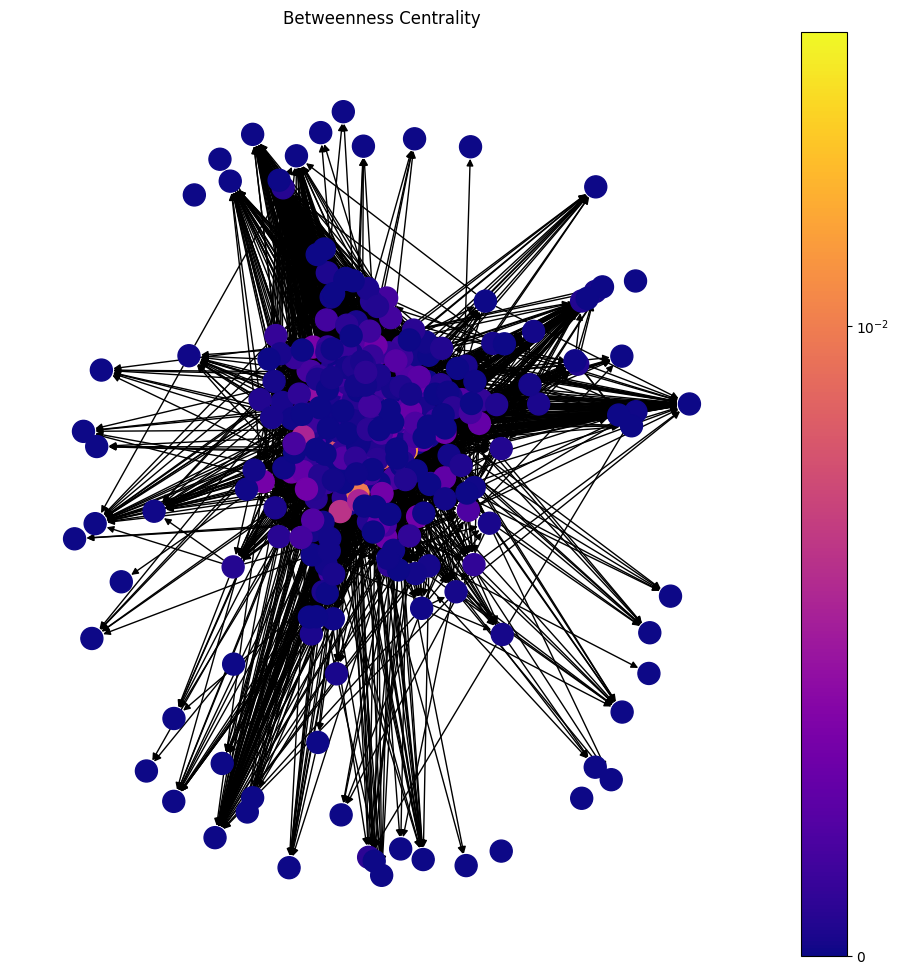

In [16]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, bet, 'Betweenness Centrality')

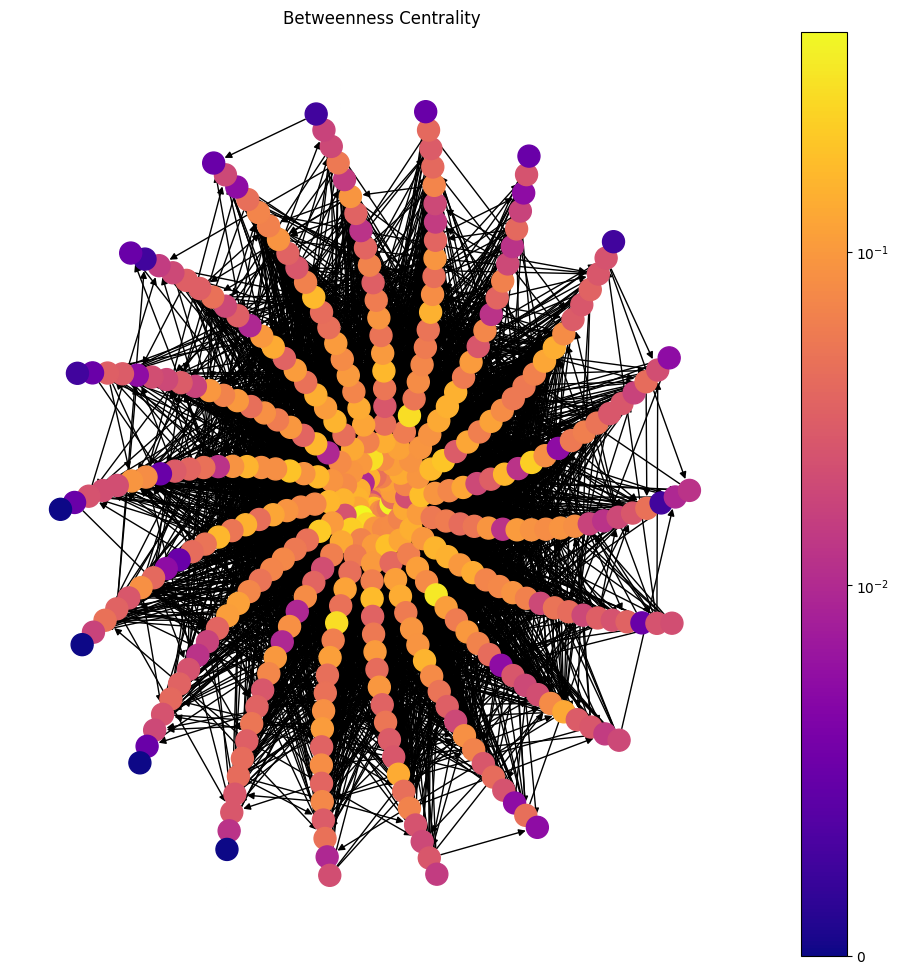

In [17]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Betweenness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{5310: Text(0.02735471902367239, 0.11149262669087207, '5310'),
 2161: Text(-0.01676052977389881, -0.021221304811692467, '2161'),
 2650: Text(0.02848047408017558, 0.0264017107194019, '2650'),
 5511: Text(-0.06559927826825036, 0.13391985697620482, '5511'),
 771: Text(0.045402538123068784, -0.08136658964823344, '771'),
 2560: Text(0.15421907983820812, -0.1277071161939405, '2560'),
 6420: Text(-0.031745141603005005, -0.15192824821309933, '6420')}

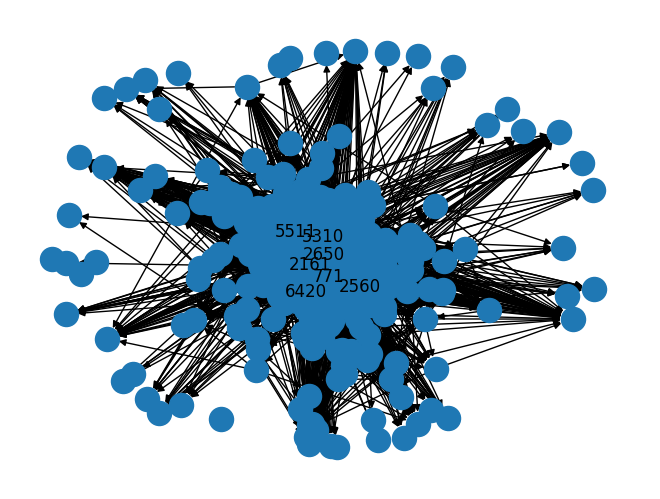

In [10]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in bet.items():
    if value > 0.008: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

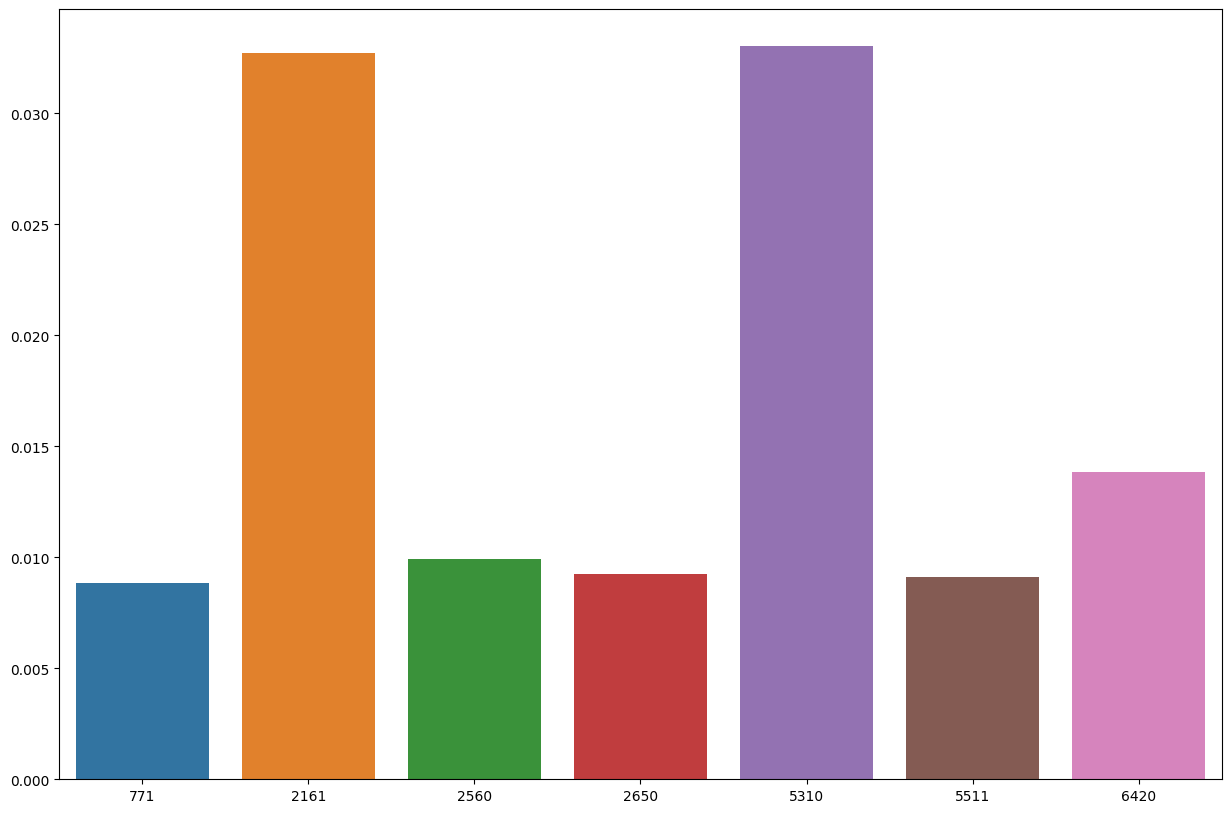

In [11]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in bet.items():
    if value > 0.008: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

Closeness Centrality

<Figure size 1500x1000 with 0 Axes>

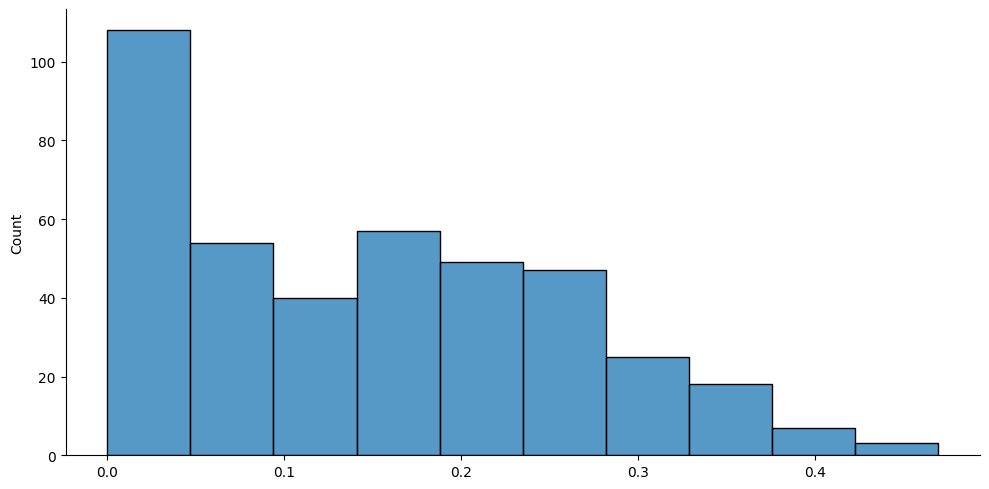

In [12]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(clos.values()), kde=False, aspect = 2)

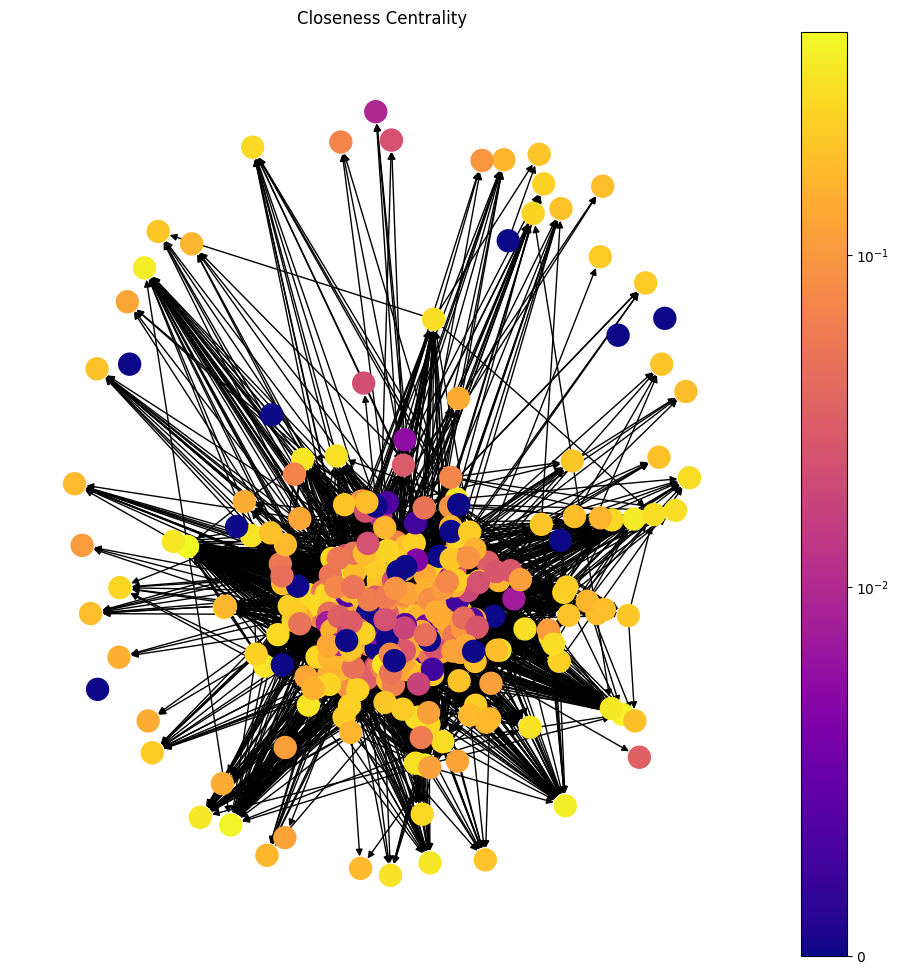

In [21]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, clos, 'Closeness Centrality')

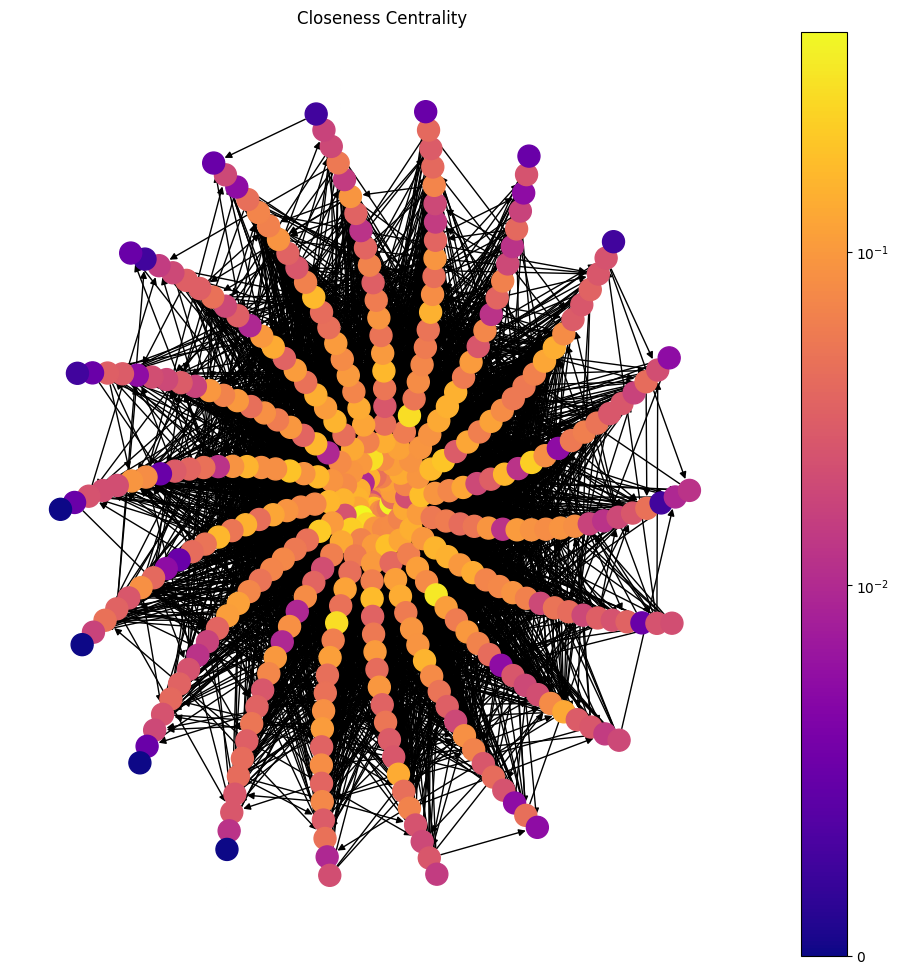

In [22]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Closeness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{1020: Text(-0.09380560993608801, 0.07307049601400828, '1020'),
 5968: Text(0.14922802320648865, -0.49226508547011905, '5968'),
 6101: Text(0.4346626046687676, -0.6257700519730153, '6101'),
 6488: Text(-0.5223669968460589, -0.4354379508607095, '6488'),
 5208: Text(-0.05449898615227731, -0.1573176514519051, '5208'),
 6374: Text(-0.7563870176472131, -0.12624634108402896, '6374')}

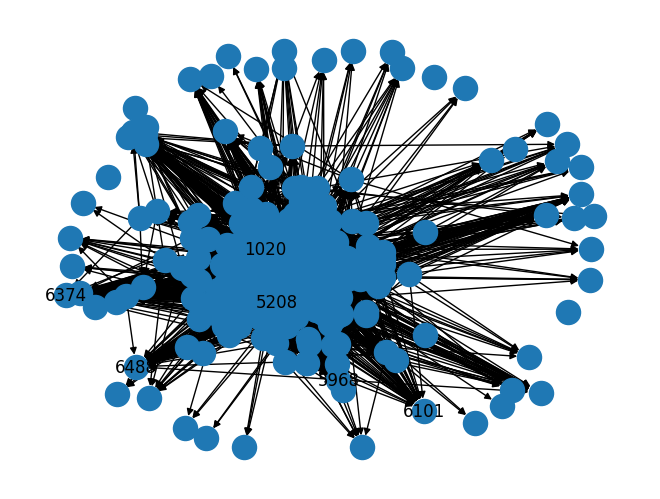

In [13]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in clos.items():
    if value > 0.4: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

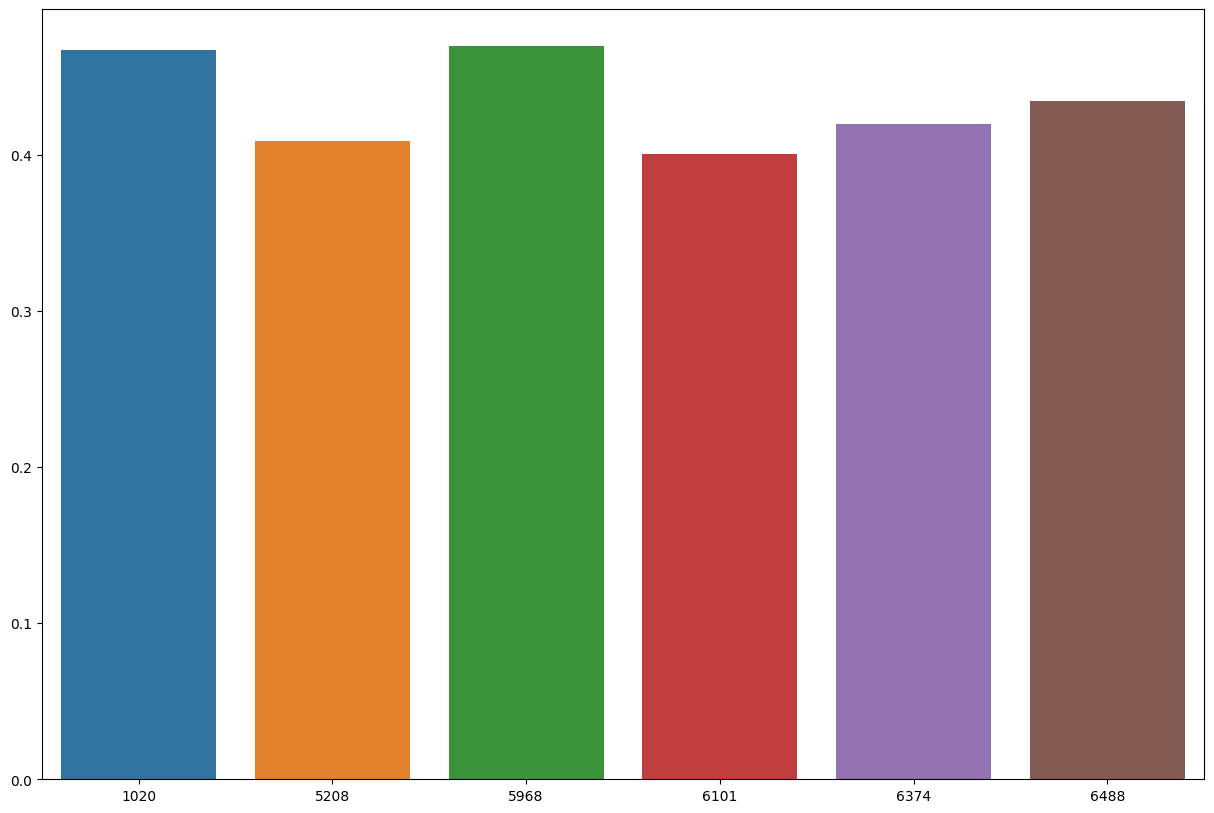

In [15]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in clos.items():
    if value > 0.4: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

Eigenvector Centrality

C:\Users\simod\AppData\Local\Temp\ipykernel_23496\1676484988.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(eigv.values()), kde=True)


<AxesSubplot:ylabel='Density'>

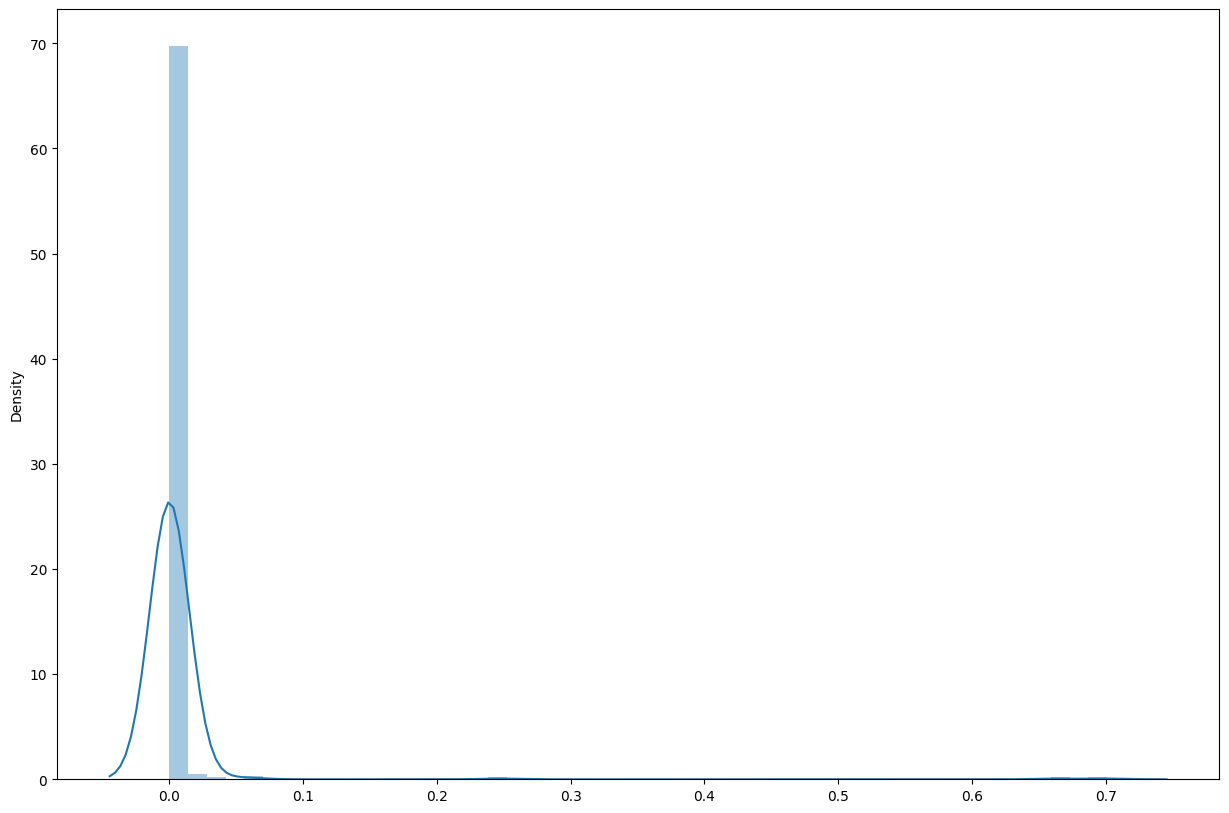

In [16]:
eigv = nx.eigenvector_centrality(graph, max_iter = 800)
plt.figure(figsize=(15,10))
sns.distplot(list(eigv.values()), kde=True)

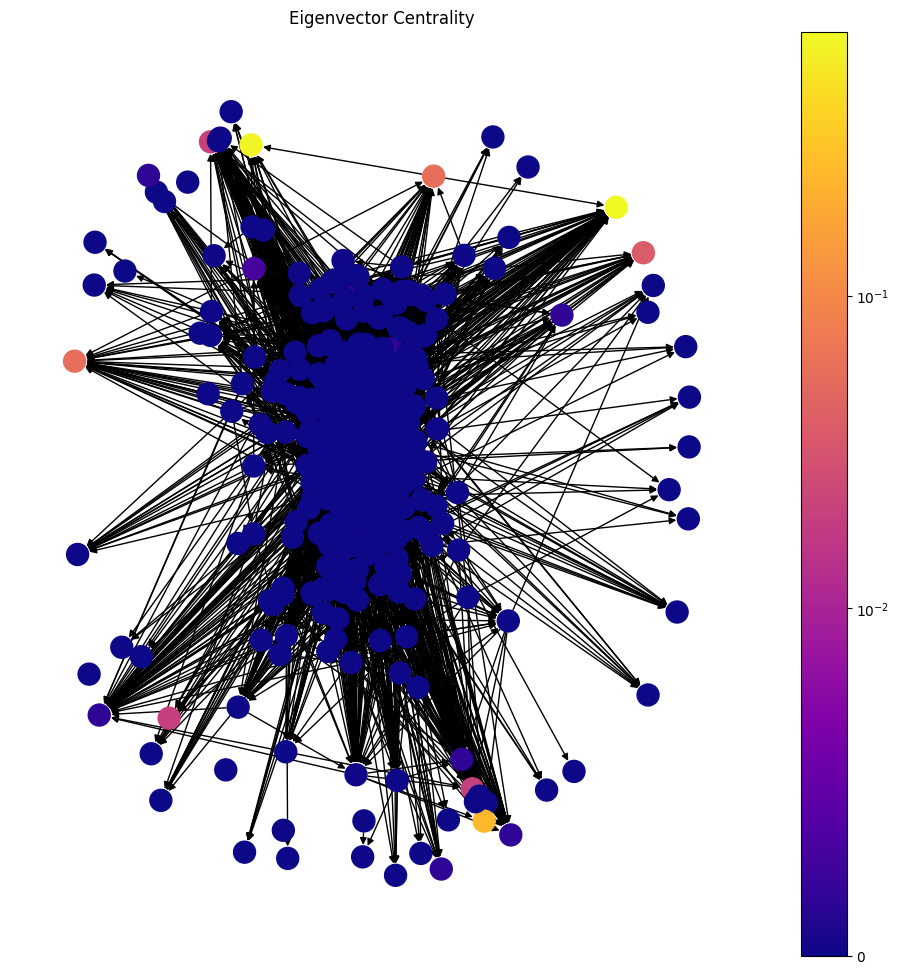

In [26]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, eigv, 'Eigenvector Centrality')

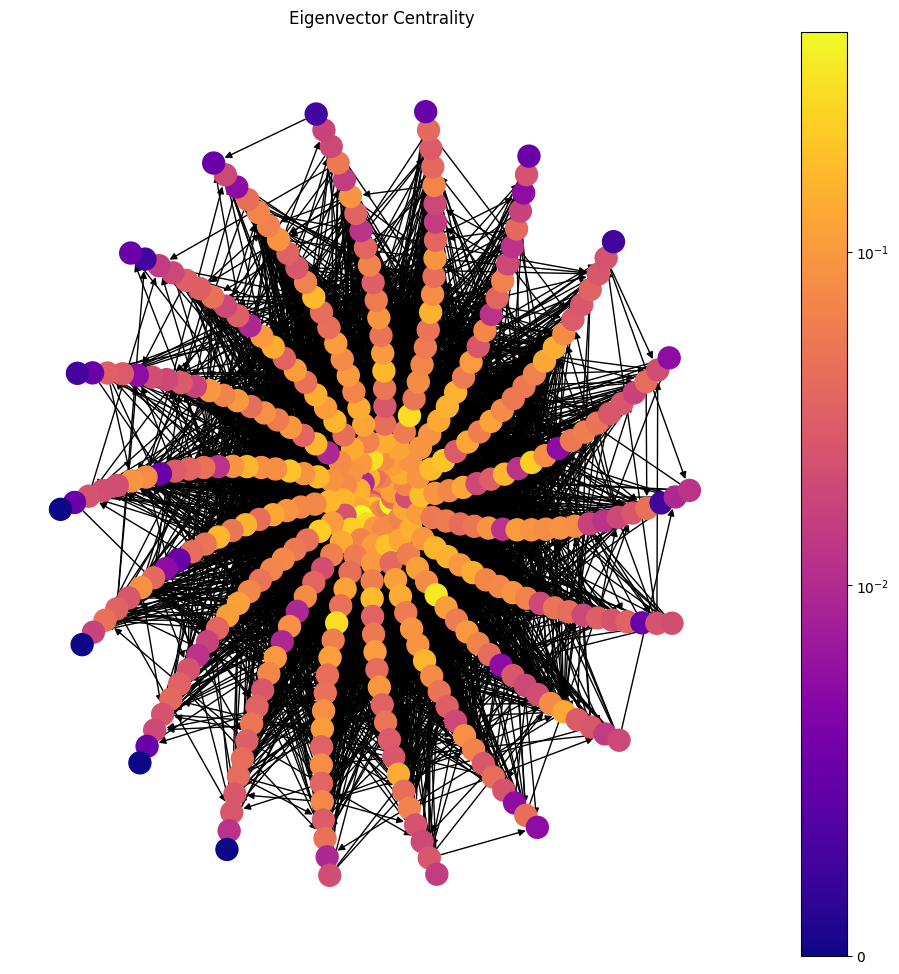

In [27]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Eigenvector Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{6354: Text(0.94401216716722, 0.12498295558040286, '6354'),
 6488: Text(-0.13686377929615512, -0.8066778565742708, '6488'),
 3948: Text(0.36948758354906047, -0.30918867208367895, '3948'),
 6374: Text(0.9466627368466424, -0.021089838737144404, '6374'),
 6463: Text(-0.7108908856257251, 0.6953126839935405, '6463'),
 6427: Text(0.8740067032408747, 0.18928384695865413, '6427'),
 6403: Text(-0.8838549514939616, 0.06598614670169664, '6403')}

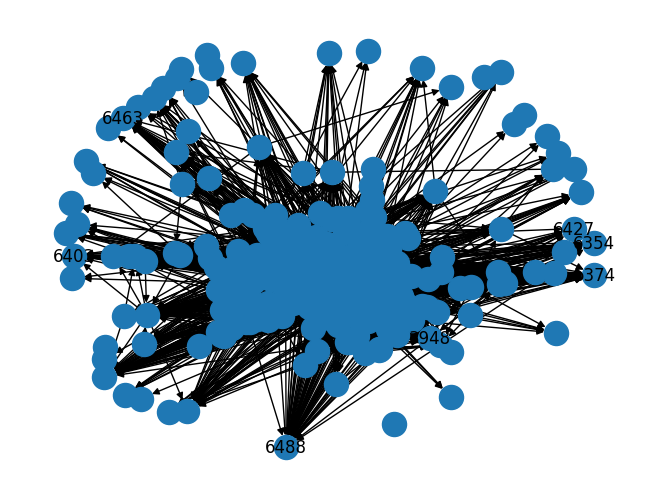

In [17]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in eigv.items():
    if value > 0.02: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

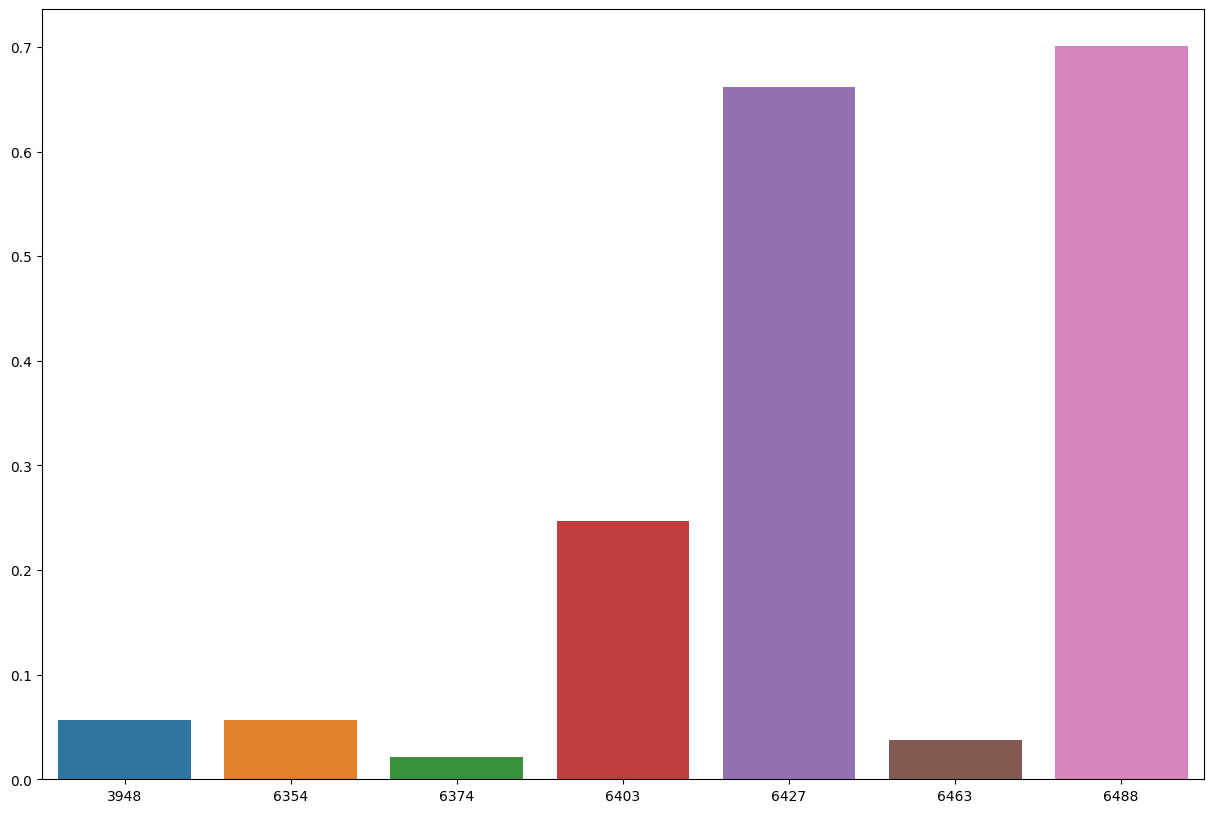

In [18]:
eigv = nx.eigenvector_centrality(graph, max_iter = 800)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in eigv.items():
    if value > 0.02: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

PageRank

<Figure size 1500x1000 with 0 Axes>

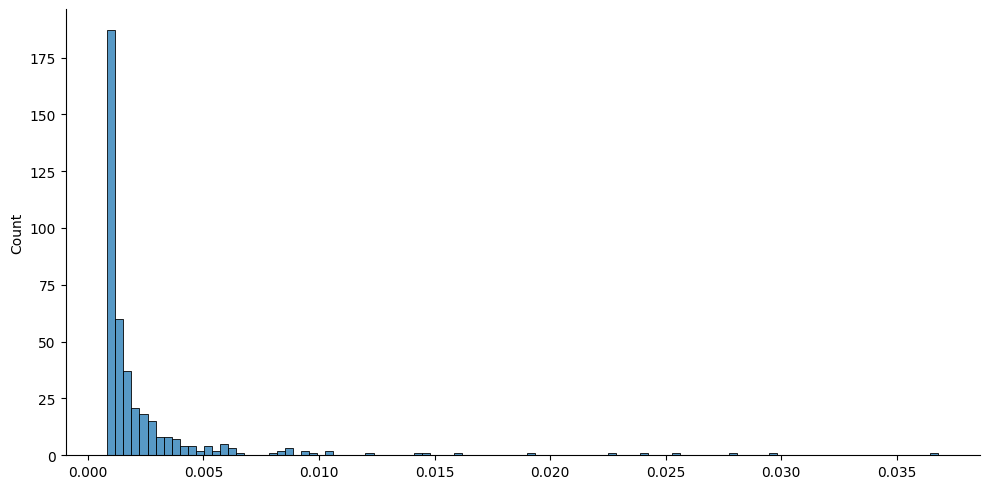

In [19]:
pager = nx.pagerank(graph, alpha=0.85) #l'alpha è chiamato damping factor
plt.figure(figsize=(15,10))
sns.displot(list(pager.values()), kde=False, aspect = 2)

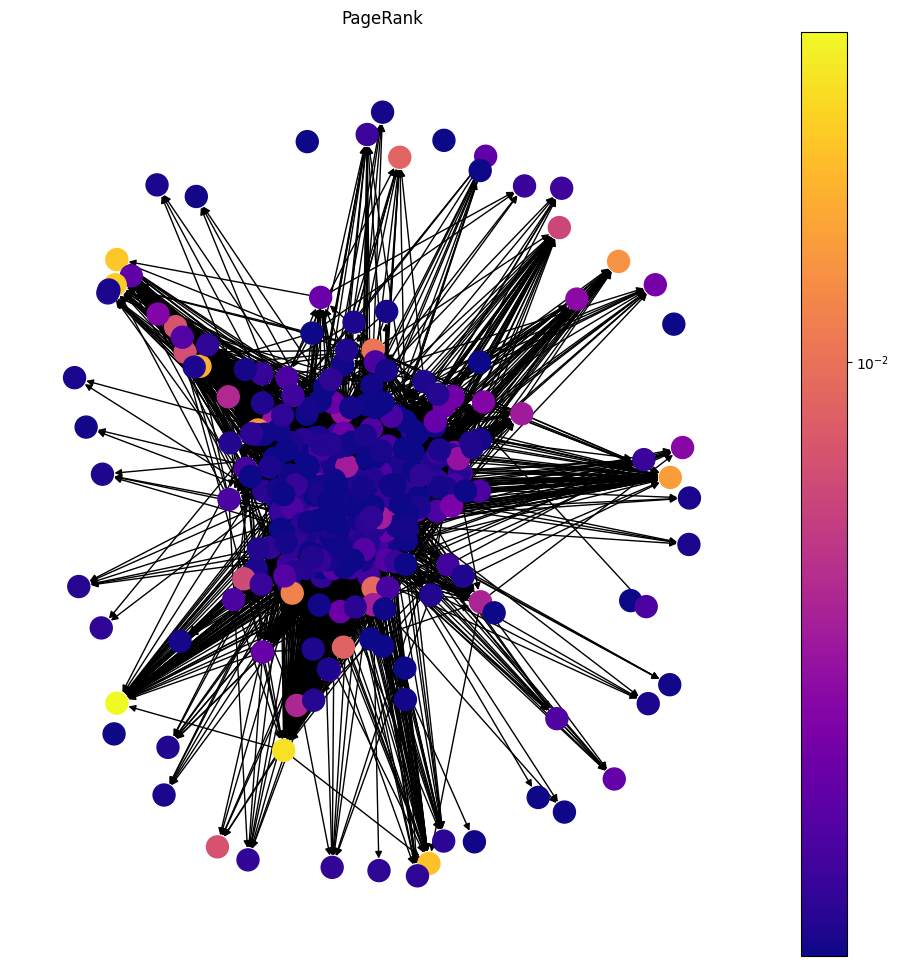

In [31]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, pager, 'PageRank')

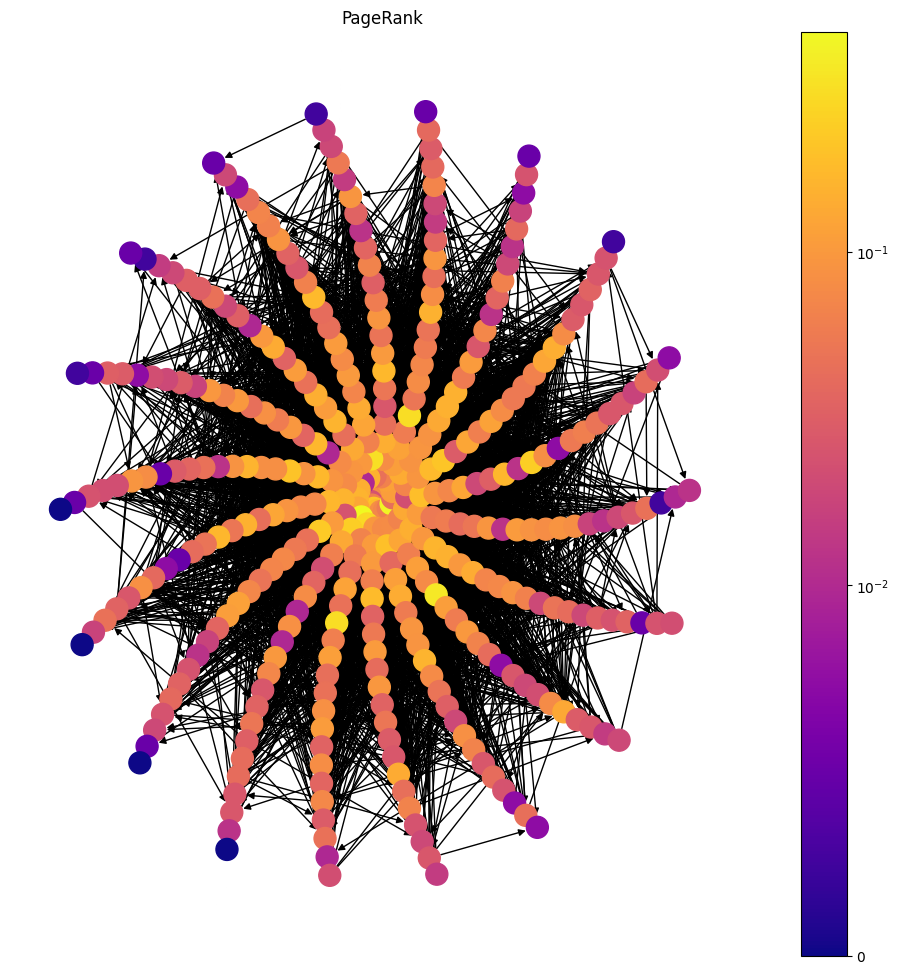

In [32]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'PageRank') # in questa forma non si riescono ad ottenere informazioni importanti

{1020: Text(0.19711780421181832, 0.044448240332069934, '1020'),
 5968: Text(-0.4082040064503879, 0.02018288261498404, '5968'),
 6354: Text(-0.5309703422611057, -0.7338273152464805, '6354'),
 6488: Text(-0.2837028132888678, 0.7734810213034008, '6488'),
 6374: Text(0.9079099637679224, -0.22416285424540008, '6374'),
 6403: Text(-0.14347806748852468, 0.816823430264535, '6403')}

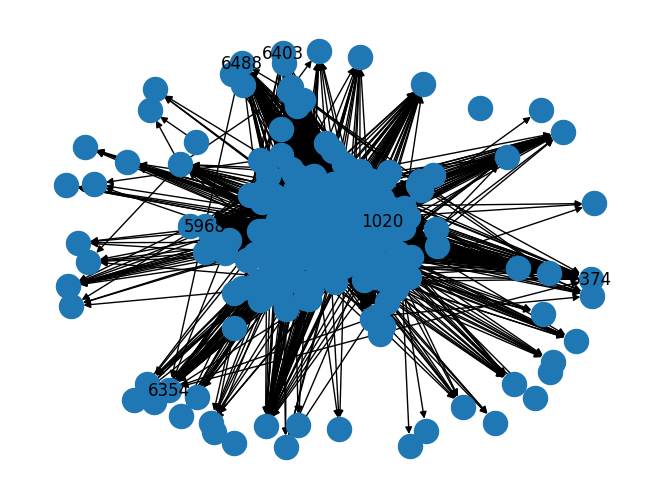

In [20]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in pager.items():
    if value > 0.02: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

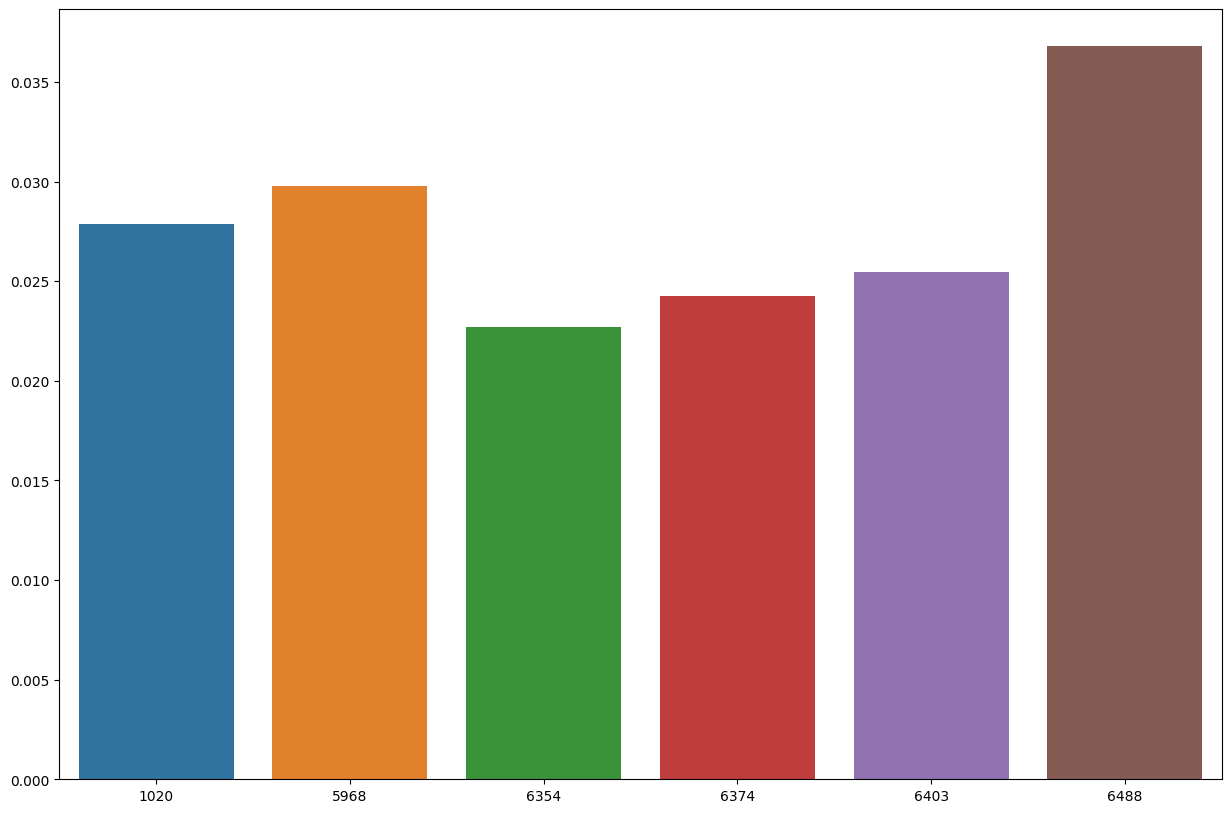

In [34]:
pager = nx.pagerank(graph, alpha=0.85) #l'alpha è chiamato damping factor
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in pager.items():
    if value > 0.02: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

### Analisi delle strutture

Communites

In [21]:
# BONUS
from networkx.algorithms import community

communities = community.greedy_modularity_communities(graph)
communities

[frozenset({38,
            98,
            119,
            142,
            183,
            238,
            285,
            388,
            410,
            412,
            431,
            472,
            483,
            500,
            507,
            535,
            539,
            577,
            586,
            592,
            612,
            761,
            774,
            819,
            871,
            959,
            1015,
            1020,
            1050,
            1055,
            1058,
            1100,
            1115,
            1155,
            1156,
            1183,
            1240,
            1261,
            1314,
            1343,
            1356,
            1358,
            1440,
            1450,
            1453,
            1502,
            1517,
            1527,
            1548,
            1551,
            1616,
            1666,
            1670,
            1687,
            1746,
            1824,
            1861,
  

In [22]:
len(communities)

9